In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Image
from skimage import io

In [3]:
image_height = 1600
image_width = 1200
dpi = 100

In [4]:
urls = [
    f"https://placekitten.com/{image_width}/{image_height}"
    ]

In [5]:
images = list()

for url in urls:
    image = io.imread(url)
    images.append(image)
    
img = images[0]

Task 1

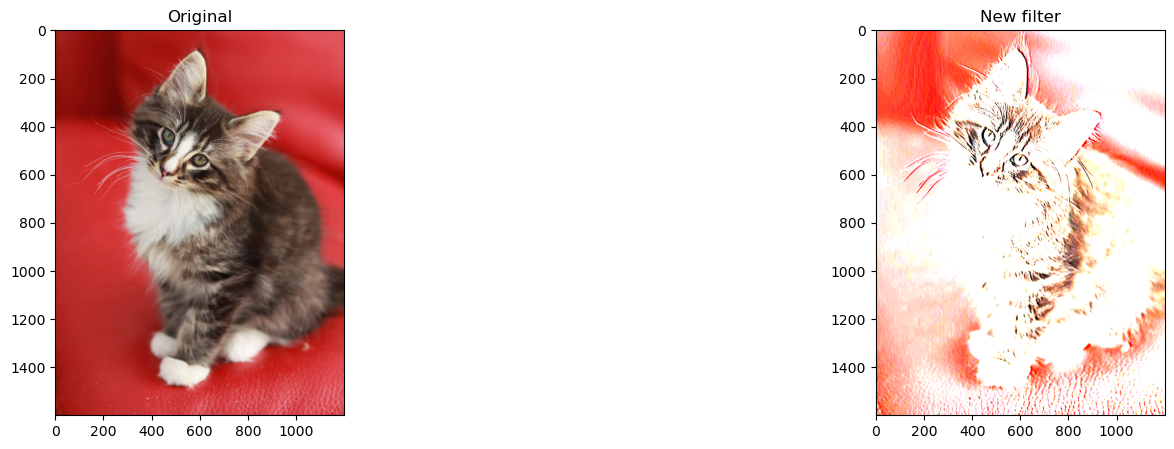

In [6]:
kernel_size = 1
kernel = np.array([[-1, 0, 1, 0, 1], [-2, 0, 1, 0, 2], [-1, 0, 1, 0, 1], [-3, 0, 1, 0, 3], [-5, 0, 1, 0, 5]], np.float32) / kernel_size ** 2


dst = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(133), plt.imshow(dst), plt.title('New filter')
plt.show()

Task 2

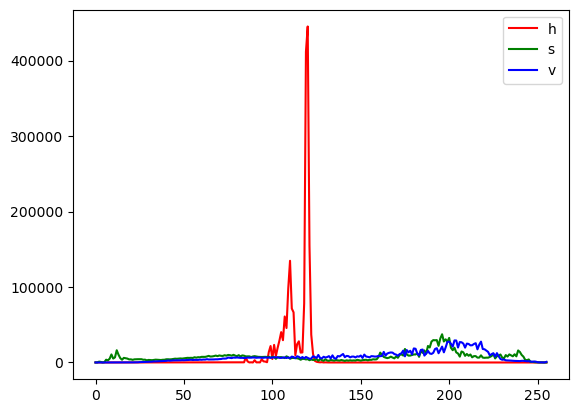

(<Axes: title={'center': 'Original'}>,
 Text(0.5, 1.0, 'Original'))

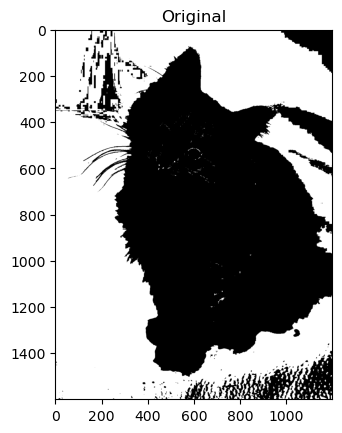

In [9]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

colors = ('h', 's', 'v')
h, s, v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

mask = cv2.inRange(img_hsv, (0,170,0), (255, 240, 255))
plt.subplot(111), plt.imshow(mask, cmap="gray"), plt.title('Original')

(<Axes: title={'center': 'edges'}>,
 Text(0.5, 1.0, 'edges'))

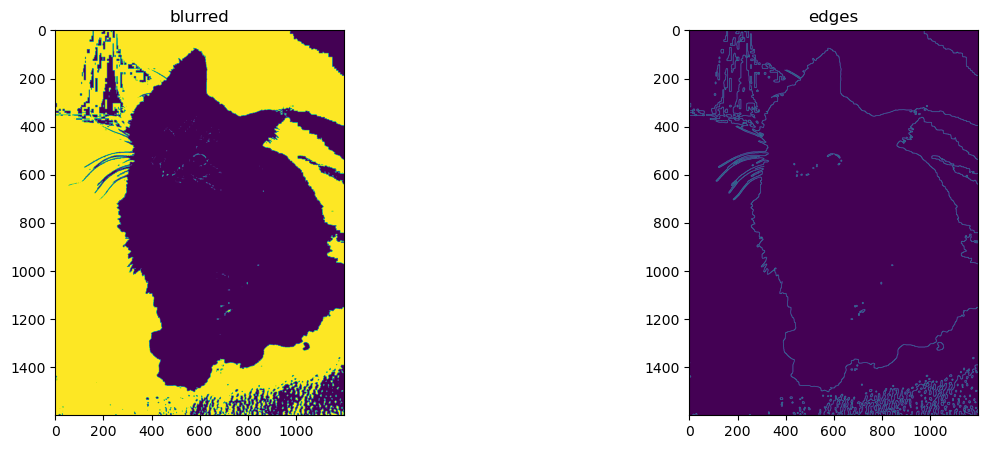

In [10]:
blurred = cv2.GaussianBlur(mask, (11, 11), 0)
edges = cv2.Canny(blurred,25,255,L2gradient=False)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(mask), plt.title('blurred')
plt.subplot(122), plt.imshow(edges), plt.title('edges')

(<Axes: title={'center': 'blurred'}>,
 Text(0.5, 1.0, 'blurred'))

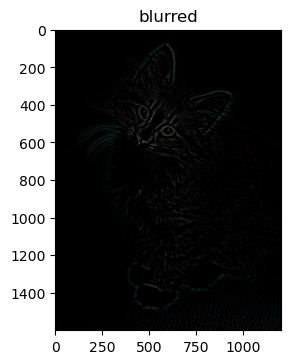

In [11]:
blurred = cv2.GaussianBlur(img, (49, 49), 0)

res = cv2.subtract(blurred, img)
plt.subplot(121), plt.imshow(res), plt.title('blurred')

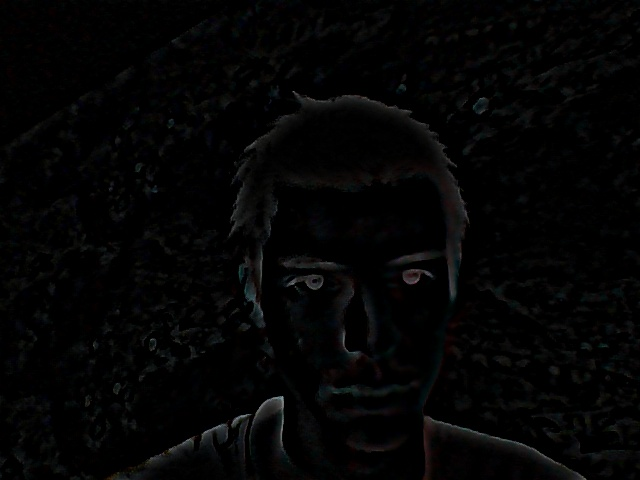

KeyboardInterrupt: 

In [37]:
cam = cv2.VideoCapture(0)
flag = True
display_handle = display(None, display_id=True)
while(flag):
    _, tick = cam.read()
    
    tick_blurred = cv2.GaussianBlur(tick, (49, 49), 0)
    tick = cv2.subtract(tick_blurred, tick)
    
    _, tick = cv2.imencode('.jpeg', tick)
    
    display_handle.update(Image(data=tick.tobytes()))

In [ ]:
cam.release()